## 1. Explore the Bitcoin blockchain and basic web coding (30 marks)

### 1.1. Extract information from your transactions

Go to your transaction history and find a way to locate the transaction on the blockchain. All wallets have a feature for viewing the transaction on the blockchain. Take a note of which block your transaction is in by taking its block height.

**Answer:** Block #825892

000000000000000007c0166af21714cc4ac459cb9803cac9d6824d9bc6b77640

(Height #825892)

From a Jupyter notebook, extract the following information from the same block by fetching data from the whatsonchain API.
https://api.whatsonchain.com/v1/bsv/main/block/height/ place block height here. Your notebook should fetch, then print your data in JSON format, and you should obtain the following for the block with your transaction in it:

- txcount
- time
- totalFees
- confirmations
- miner

Include some code that converts the unix timestamp into human readable format to the nearest second. Explain what each of these parts of the block are in words.

In [1]:
import json
import requests
import datetime

# Fetch data from the Whatsonchain API
answer = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/825892")
genesis_block = json.loads(answer.text)

# Extract relevant information with formatted time
timestamp = datetime.datetime.fromtimestamp(genesis_block['time'])
results = {
    'txcount': genesis_block['txcount'],
    'time': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
    'totalFees': genesis_block['totalFees'],
    'confirmations': genesis_block['confirmations'],
    'miner': genesis_block['miner']
}

# Print the formatted result
print(results)

{'txcount': 877, 'time': '2024-01-06 09:50:04', 'totalFees': 0.0020447499999995955, 'confirmations': 1240, 'miner': 'qdlnk'}


**Data explaination:**

- txcount: The number of transactions in the block.

- time: The timestamp when the block was mined.

- totalFees: Total fees paid by users for all transactions in the block.

- confirmations: The number of confirmations in this block, which represent the acceptance of a new block by the blockchain network. 

- miner: The entity or mining pool that mined the block.

### 1.2. Basic web coding

**1.2.1 Generates a random private key that is not shown on the webpage**

This part has been done in another file of the repository folder.

**1.2.2. From the private key, constructs a corresponding public key, and address**

This part has been done in another file of the repository folder.

**1.2.3. From the address, generates an associated QR code for receiving money**

This part has been done in another file of the repository folder.

## 2. Time series Investigation of Bitcoin price

### 2.1. Obtain Time Series Data

Obtain the following data by calling the FRED api (or any other of your choice) from a Jupyter notebook, and provide simple time series plots of the raw data: You must provide plots of three time series

1. A chosen price of a cryptocurrency, or any other individual stock that is considered to be high risk

2. A chosen price of an asset that is considered safe, like a stock price for a well known large company (if you like, you can obtain this from other api services like yahoo or quandl, or use FRED as on the course, with Gold price index code, for example ID7108)

3. An index measure of overall stock market performance (eg the S&P500). Be sure to label your three series clearly, so that anyone reading your code can easily understand the analysis.

In [2]:
# Install the pandas library for data manipulation and analysis 
# Install the matplot library for data visualisation
# Install the pandas_datareader to extract data from various internet sources into a pandas dataframe 
# Install the fredapi library
%pip install pandas numpy matplotlib pandas_datareader fredapi statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
## Reference to fetch data from FRED: 
# To get key: https://fred.stlouisfed.org/docs/api/api_key.html
# For data information: https://fred.stlouisfed.org/
# To fetch data: https://pypi.org/project/fredapi/ 

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from fredapi import Fred
# Set the FRED API key
fred = Fred(api_key = '74b63ef23274a172ccb5431fda9d90fb')

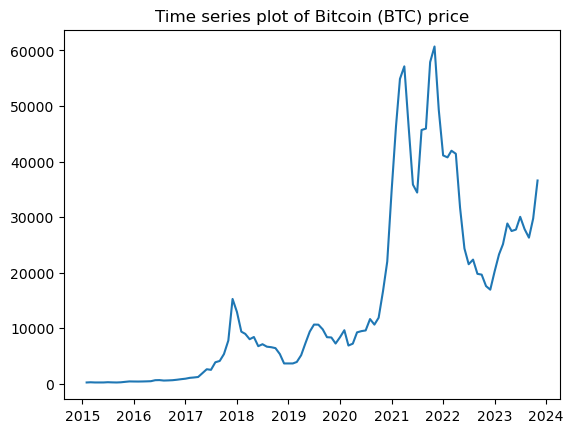

In [5]:
# Get data from FRED
bitcoin_price = fred.get_series('CBBTCUSD', '2015-02-01','2023-11-01',frequency = 'm')
# Time series plot of a high risk asset (Bitcoint (BTC) price)
plt.plot(bitcoin_price.index, bitcoin_price.values)
plt.title('Time series plot of Bitcoin (BTC) price')
plt.show()

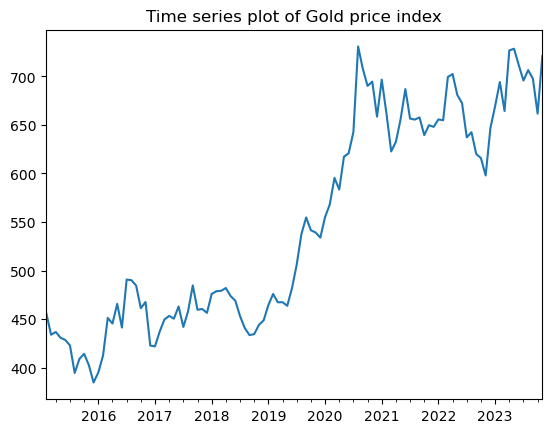

In [6]:
# Time series plot of a safe asset (Gold price index)
gold_price_index = fred.get_series('ID7108','2015-02-01','2023-11-01',frequency = 'm')
gold_price_index.plot(title = 'Time series plot of Gold price index')
plt.show()

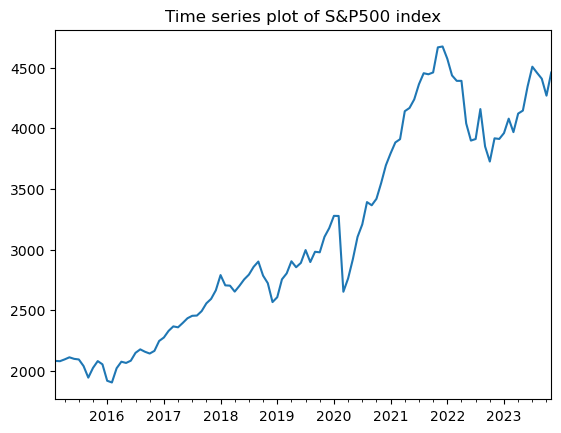

In [7]:
# Time series plots of an index measure of overall stock market performance(S&P500 index)
SP500_index = fred.get_series('SP500','2015-02-01','2023-11-01',frequency = 'm')
SP500_index.plot(title = 'Time series plot of S&P500 index')
plt.show()

### 2.2. Data Transformations

- Choose the longest possible time span to conduct your analysis.

- Make sure that your 3 data series are placed together into a Pandas
DataFrame, with compatible time periods

- Transform observations into returns by obtaining new series: $ln$ $x_t \over x_{t−1}$

where $x_t$ is the value of a variable for a particular observation and $x_{t−1}$ is its value 1 time period before

In [8]:
# Create a DataFrame with compatible time periods
data_df = pd.DataFrame({
    'Bitcoin price': bitcoin_price,
    'Gold price index': gold_price_index,
    'S&P500 index': SP500_index
    })

# Display the DataFrame
print(data_df)
data_df.to_csv('data_df.csv')

            Bitcoin price  Gold price index  S&P500 index
2015-02-01         235.00             455.8       2082.20
2015-03-01         270.12             433.9       2079.99
2015-04-01         236.22             436.7       2094.86
2015-05-01         237.43             430.8       2111.94
2015-06-01         238.42             428.5       2099.28
...                   ...               ...           ...
2023-07-01       30057.10             695.7       4508.08
2023-08-01       27849.98             706.5       4457.36
2023-09-01       26305.66             697.6       4409.10
2023-10-01       29754.17             661.6       4269.40
2023-11-01       36595.67             721.1       4460.06

[106 rows x 3 columns]


In [9]:
# Calculate returns for each asset index
bitcoin_monthly_returns = np.log(bitcoin_price/bitcoin_price.shift(1)).dropna()

gold_monthly_returns = np.log(gold_price_index/gold_price_index.shift(1)).dropna()

SP500_monthly_returns = np.log(SP500_index/SP500_index.shift(1)).dropna()

# Create a new dataframe for these returns
returns_df = pd.DataFrame({
    'Bitcoin monthly retuns': bitcoin_monthly_returns,
    'Gold monthly returns': gold_monthly_returns,
    'S&P500 monthly returns': SP500_monthly_returns
    })
returns_df
returns_df.to_csv('returns_df.csv')

### 2.3. Data Analysis

What is the correlation between the returns on risky and safe assets, and the market returns? Interpret these results with respect to CAPM theory.

According to the assumptions behind the strict form of CAPM theory, equations of the following form should fully explain returns to holding any particular asset, here for bitcoin as an example with subscript b, subscript f refers to the risk free rate, and subscript m refers to the overall market (eg the S&P500 index returns).

$$ r_{bt} − r_{ft} = \alpha_b + \beta_b * (r_{mt} − r_{ft}) + u_{bt} $$

where $u_{bt}$ is an idiosyncratic unpredictable error term associated with Bitcoin. According to the strict form of CAPM, $\alpha$ should be zero, and $\beta$ provides a systematic measure of how high up the risk/return trade-off the asset is. Estimate $\alpha$ and $\beta$ for your chosen risky asset, using OLS regression, and interpret the results.

In [10]:
# Define regressive variables
diff_bitcoin_and_gold = bitcoin_monthly_returns - gold_monthly_returns
diff_SP500_and_gold = SP500_monthly_returns - gold_monthly_returns

# Create a dataframe of returns for regression
regression_df = pd.DataFrame({
    'Bitcoin risk premium': diff_bitcoin_and_gold,
    'Market risk premium': diff_SP500_and_gold
    })

# Add a constant term for intercept in regression
regression_df = sm.add_constant(regression_df)

# Fit OLS regression model
model = sm.OLS(regression_df['Bitcoin risk premium'], regression_df[['const', 'Market risk premium']])
results = model.fit()

# Print regression results
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Bitcoin risk premium   R-squared:                       0.196
Model:                              OLS   Adj. R-squared:                  0.188
Method:                   Least Squares   F-statistic:                     25.09
Date:                  Mon, 15 Jan 2024   Prob (F-statistic):           2.28e-06
Time:                          01:21:29   Log-Likelihood:                 38.401
No. Observations:                   105   AIC:                            -72.80
Df Residuals:                       103   BIC:                            -67.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

**Result intepretation:**

The above ouput provides summary results of the Ordinary Least Squares (OLS) regression model. This model contains various statistics to evaluate the goodness of fit and statistical significance of the estimated coefficience.

- The dependent variable is 'bitcoin risk premium', denoted as $(r_{bt} - r_{ft})$, representing the excess return of the risky asset (bitcoin) over the risk-free asset (gold). This is a part of the risky asset's return that is not explained by the risk-free asset.

- The independent variable is 'market risk premium', denoted as $(r_{mt} - r_{ft})$,representing the difference between market return (S&P500 index) and the risk-free asset (gold price index). Market risk premium is the rate of return on a risky investment.

- The intercept term ($\alpha_b$) is 0.0390 represents the estimated value of the dependent variable when the independent variable (market risk premium) is zero.

- The coefficient of market risk premium ($\beta_b$) is 1.6192 implies that a one-unit increase in the market risk premium results in 1.6192 unit increases in the bitcoint risk premium. 

- The coefficient of determination (R-squared) is 0.196 indicates that approximately 19.6% of variability in the bitcoin risk premium is explained by the market risk premium.

- The adjusted R-squared, which is 0.188, adjusts the R-squared value based on the number of predictors in the model. The adjusted R-squared is slightly lower than the R-squared.

- F-statistic is the test statistic for the overall significance of the model. This statistic evaluates whethe the model, with its predictors, explains the variance in the dependent variable better than a model with no predictor. F-statistic in this case is very small (2.28e-06), suggesting that the model is statistically significant.

- P-values of the intercept and market risk premium are quite small (less than 0.05) indicate that they are statistically significant. 

## 3. Machine learning in practice

### 3.1. High Level Description of FinTech Firm

Provide a written description of Sarunas’ FinTech firm in words. You are not expected to explain technical parts in depth, but provide a mechanical description of what each of the four structural parts do, how they interact, and what they achieve overall. Include a description of what Logistic regression is, and why it is a useful machine learning technique.

Answer: 

Sarunas's fintech firm offers an array of services, covering statistical modelling, data storage, data analysis, and loan application processing, to individuals. Leveraging loan data from Kaggle, the firm's primary objective is to forecast whether or not borrowers will fulfil their loan repayment obligations. The Logistic Regression model has been deployed to accomplish this prediction, delivering binary results that address the prior stated question.

From the perspective of architecture, each Sarunas service is located inside a Docker container. Within the Docker-based architecture, every container operates as a virtual machine learning entity, boosting the company's agility and effectiveness. This design makes sure that the fintech firm's many services operate together seamlessly and with optimized functionality.

The Streamlit UI service, which is similar to the FastAPI, delivers an easy and rapid approach towards building applications. Sarunas' fintech startup occupies Streamlit UI to deliver a front-end user experience that allows clients to enter essential data for loan processing.

The Statistical Model service processes the submitted information and data acquired from Kaggle through the Fast API infrastructure, employing the Logistic Regression model to predict the likelihood that the customers will settle their loans. Particularly, the firm elects four relevant customer features: loan amount (denoted as 'loan_amount', representing the requested loan amount filled by customers), annual income (denoted as 'annual_inc', representing individual annual income), term (denoted as 'term', representing the requested loan duration), and employment length (denoted as 'emp_length', representing the number of years an individual has been employed).  

This dataset is the processed to handle missing values and standardised key features. The target variable, 'loan_status', is transformed into a binary formart, where 'Fully Paid' is represened as 1 and 'Charge Of' is represented as 0. The Logistic Regression model is constructed using the scikit-learn library, incorporating a pipeline that includes a MinMaxScalar for scaling features. This model is trained on a subset of the dataset, specifically the 'X_train' and 'y_train' split. It is used to predict probabilities on 'X_test', and the Receiver Operating Characteristic (ROC) curve is plotted to evaluate its performance. Additionally, an accuracy analysis is conducted, varying the classification threshold to assess the model's performance under different scenarios.


 The firm computes accuracy scores across a range of thresholds and visualises the results. This analysis helps in fine-tuning the model and determining the optimal threshold for making loan repayment predictions.

The predictive model, encapsulated within a Python pickle file ('model.pkl'), is saved for deployment within the fintech firm's infrastructure. The deployment allows the firm to seamlessly integrate this predictive capability into its loan issuance services, contributing to a data-driven and efficient decision-making process.

The Postgres Database, in this context, is a non-relational database which stores loans requests and responses yielded from the Statistical Model service.

JupyterLab is utilised for data analysis and exploration. The firm makes use of Jupyter notebooks (e.g., explore.ipynb) to analyse the loan data, and interact with the trained machine learning model. 


### 3.2. Written Description of Python Code

Import necessary libraries

In [11]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

**Data Taken From:** https://www.kaggle.com/wordsforthewise/lending-club </br>
**Model is From:** https://www.kaggle.com/benesalvatore/predict-default-using-logisitic-regression

Create a python list named 'features' including 4 elements 'loan_amnt', 'annual_inc', 'term', 'emp_length'.

In [12]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

Load the 'accepted_2007_to_2018Q4.csv' file into a DataFrame, only use columns that have been defined in the 'feature' list and the 'loan_status' column. 

Assign the DataFrame with the variable 'a'.

In [13]:
a = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])

Create a new DataFrame named 'full_set' by filtering the 'loan_status' column in the DataFrame 'a'. Select rows in the 'loan_status' column with values 'Fully Paid' or 'Charged Off', and then make a copy to generate a new DataFrame 'full_set' to ensure that the modification does not impact the original data.

In [14]:
full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

Remove rows with missing values in the 'emp_length' column from the 'full_set' DataFrame.

In [15]:
full_set = full_set.dropna(subset=['emp_length'])

# Build the model - Logistic Regression

1. Transform our Label *loan_status* and other columns

Transform values in the 'loan_status' column of the 'full_set' DataFrame into numerical format. Specifically, 'Fully Paid' is replaced with 1 and 'Charged Off' is replaced with 0.

Transform values in the 'term' column of the 'full_set' DataFrame into numerical format. Specifically, '36 months' is replaced with 36 and '60 months' is replaced with 60.

In [16]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

Modify the 'emp_length' column in the 'full_set' DataFrame by extracting the numeric part and handling special characters such as '+', '<', and converting them to appropriate numerical values.

In [17]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

**Build Model**

Define the features for the model by listing all columns in the 'full_set' DataFrame except for the 'loan_status' column.

In [18]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

Print the first 05 rows of the 'full_set' DataFrame.

In [19]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


Split the 'full_set' DataFrame into training and testing sets: 'X_train' and 'X_test' include the selected model features, while 'y_train' and 'y_test' contain the corresponding 'loan_status' labels.

Then set a seed for the random number generator to ensure that users will obtain the same split each time running the code.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

Initialise the Logistic Regression model, which is used for binary classification tasks.

Create a MinMaxScaler model, which is a prepocessing tool to standardise feature ranges, typically scaling values between 0 and 1.

In [21]:
model = LogisticRegression()
scaler = MinMaxScaler()

Define a machine learning pipeline named pipeline with two steps: scaling the features using MinMaxScaler and employing a logistic regression model for training and prediction.

In [22]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

Train the machine learning model defined in the pipeline using the training data (X_train for features and y_train for labels)

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

### 3.3. Build your own Machine Learning Model 

Use the same data set obtained from Kaggle dataset and use SVC model to forecast the result.

Create an SVC model and a scaler.

model = SVC()

scaler = MinMaxScaler()

from sklearn.svm import SVC

features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

a = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])

full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

full_set = full_set.dropna(subset=['emp_length'])

full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

model_features = list(full_set.columns)
model_features.remove('loan_status')

X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

Create an SVC model and a scaler

model = SVC()
scaler = MinMaxScaler()


pipeline = Pipeline([('scaler', scaler), ('model', model)])

pipeline.fit(X_train, y_train)